<a href="https://colab.research.google.com/github/jayeshhajare24/Unemployment-Analysis-using-python/blob/main/unemployment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset file

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India (1).csv to Unemployment in India (1) (1).csv


import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

Load Dataset

In [4]:
df = pd.read_csv("Unemployment in India (1).csv")

df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Data Cleaning


In [5]:
import pandas as pd

df = pd.read_csv("Unemployment in India (1).csv")

# Check basic info
df.info()

# Remove extra spaces from column names
df.columns = df.columns.str.strip()

#Rename Column
df.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values
df.isnull().sum()

# Drop missing values
df.dropna(inplace=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


/tmp/ipython-input-155/3729193706.py:21: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,State,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [6]:
df.describe()


,Date,Unemployment_Rate,Employed,Labour_Participation_Rate
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


Average Unemployment Rate

In [7]:
print("Average Unemployment Rate:", df['Unemployment_Rate'].mean())


Average Unemployment Rate: 11.787945945945946


Visualization

Overall Unemployment Trend Over Time

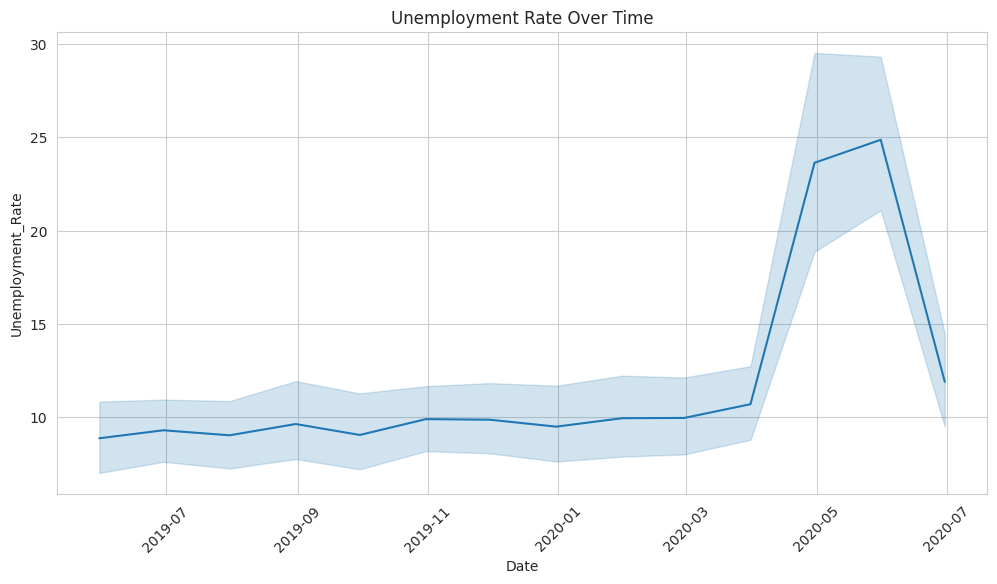

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title("Unemployment Rate Over Time")
plt.xticks(rotation=45)
plt.show()


Covid-19 Impact Analysis (2020 Focus)

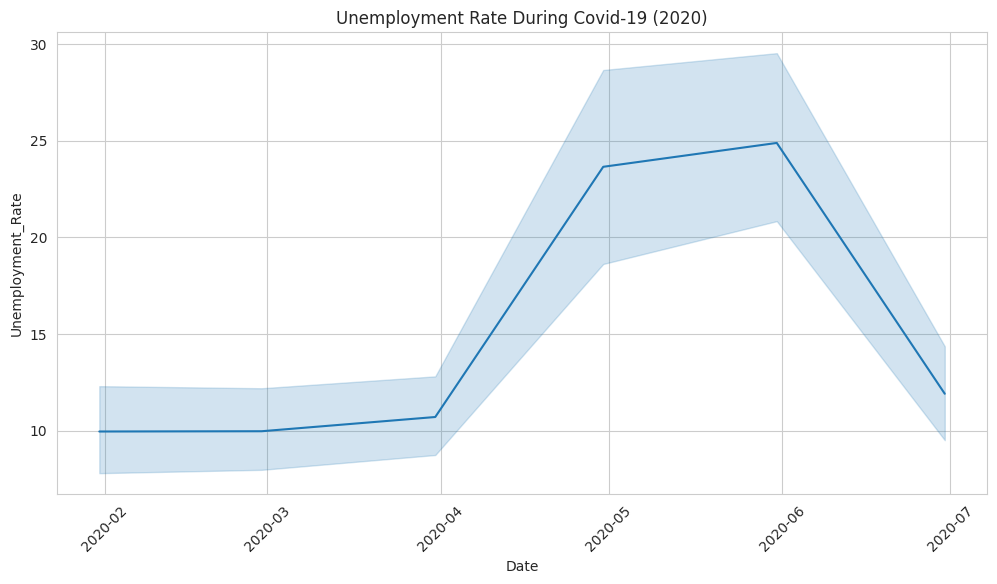

In [9]:
# Filter 2020 data
covid_data = df[df['Date'].dt.year == 2020]

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=covid_data)
plt.title("Unemployment Rate During Covid-19 (2020)")
plt.xticks(rotation=45)
plt.show()


State-wise Unemployment (Top 10)

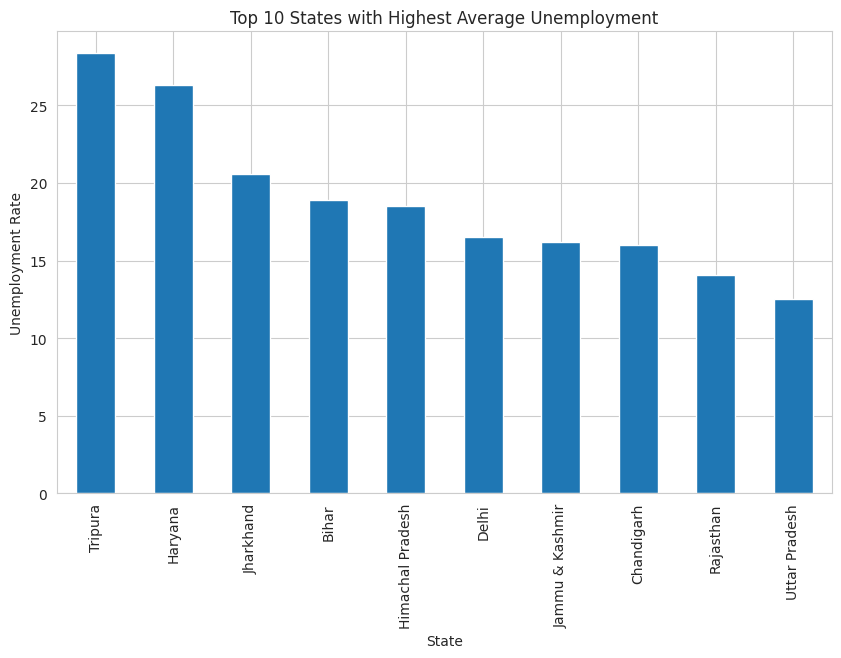

In [10]:
state_avg = df.groupby('State')['Unemployment_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
state_avg.head(10).plot(kind='bar')
plt.title("Top 10 States with Highest Average Unemployment")
plt.ylabel("Unemployment Rate")
plt.show()


Monthly Trend (Seasonality Check)

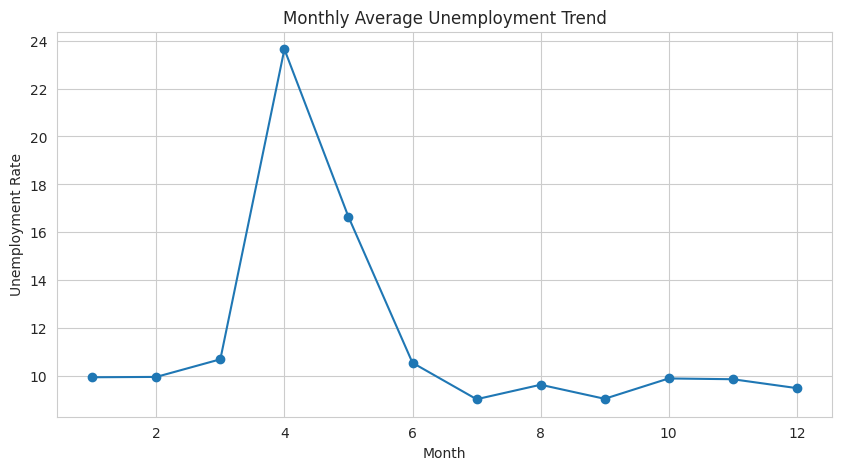

In [11]:
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Unemployment_Rate'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(marker='o')
plt.title("Monthly Average Unemployment Trend")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.show()


Correlation Analysis

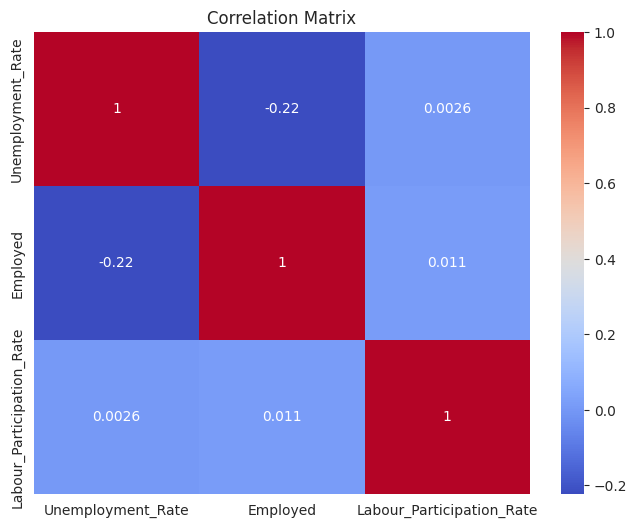

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Unemployment_Rate','Employed','Labour_Participation_Rate']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Moving Average

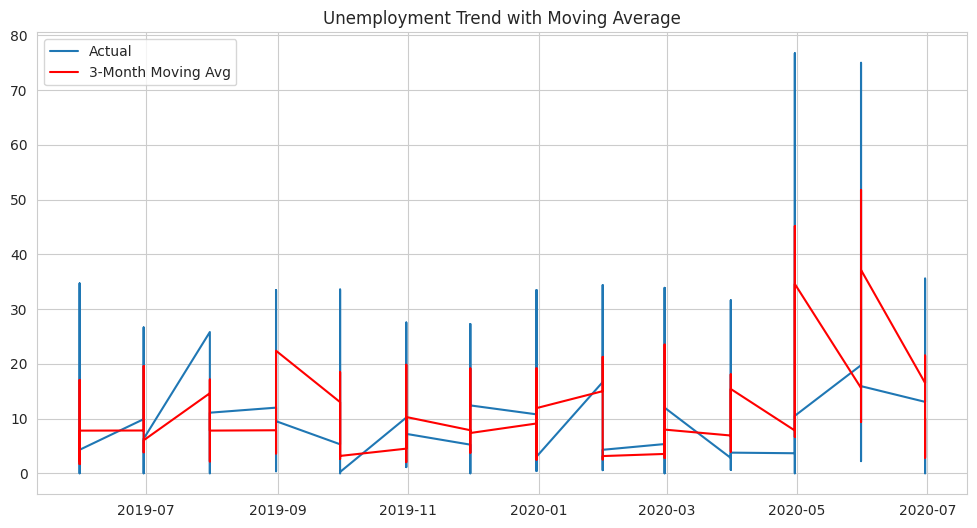

In [13]:
df_sorted = df.sort_values('Date')

df_sorted['Moving_Avg'] = df_sorted['Unemployment_Rate'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(df_sorted['Date'], df_sorted['Unemployment_Rate'], label='Actual')
plt.plot(df_sorted['Date'], df_sorted['Moving_Avg'], label='3-Month Moving Avg', color='red')
plt.legend()
plt.title("Unemployment Trend with Moving Average")
plt.show()
